In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

Статистика по несбалансированному дереву со случайными значениями
Начальный MSE: 397.358438
MSE = 1.781613


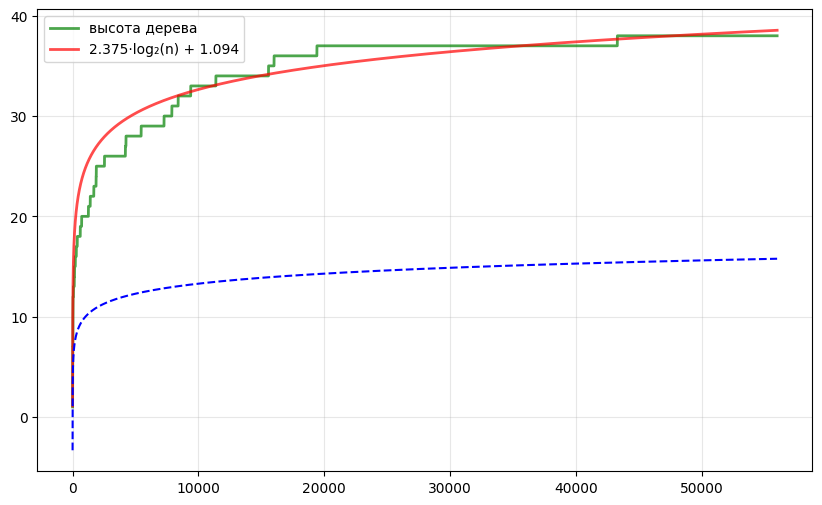

In [31]:
n, h = np.loadtxt('Debug x64\\stat_BST.txt', unpack=True)
print('Статистика по несбалансированному дереву со случайными значениями')

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'green', linewidth=2, alpha=0.7,
        label='высота дерева')

def stat(a,b):
        return a*x + b

def MSE(a,b):
        f = stat(a,b)
        return np.average(np.square(f-y))

step = 0.0005
a = 1.0
b = 1.0

MSE_prev = MSE(a,b)
print(f"Начальный MSE: {MSE_prev:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        a_prev = a
        b_prev = b
        a-=step*grad_a
        b-=step*grad_b
        
        MSE_current = MSE(a,b)
        if (MSE_prev < MSE_current):
                a = a_prev
                b = b_prev
                break
        else:
                MSE_prev = MSE_current

print(f"MSE = {MSE(a, b):.6f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по АВЛ-дереву со случайными значениями
Начальный MSE: 4.666705
MSE = 0.086978


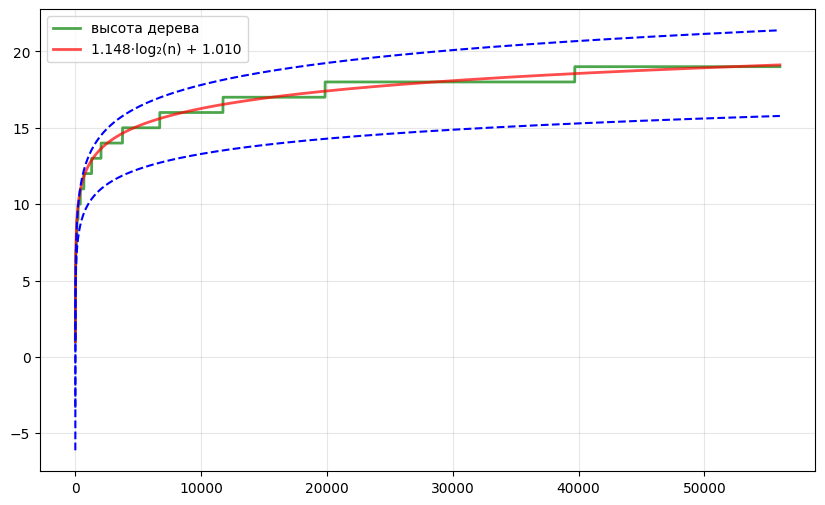

In [26]:
n, h = np.loadtxt('Debug x64\\stat_AVL.txt', unpack=True)
print('Статистика по АВЛ-дереву со случайными значениями')

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'green', linewidth=2, alpha=0.7,
        label='высота дерева')

def stat(a,b):
        return a*x + b

def MSE(a,b):
        f = stat(a,b)
        return np.average(np.square(f-y))

# E = 1/i (sum|ax+b-y|)
# dE/da = 1/i * (-1)/(1)x
# dE/db = 1/i * -1 / 1
step = 0.0005
a = 1.0
b = 1.0

MSE_prev = MSE(a,b)
print(f"Начальный MSE: {MSE_prev:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        a_prev = a
        b_prev = b
        a-=step*grad_a
        b-=step*grad_b
        
        MSE_current = MSE(a,b)
        if (MSE_prev < MSE_current):
                a = a_prev
                b = b_prev
                break
        else:
                MSE_prev = MSE_current

print(f"MSE = {MSE(a, b):.6f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

# через MSE по принципу linregress

# y = h, x = log_n
# E=1/i S[(ax+b-y)^2]
# dE/da = 2/i S[(ax+b-y)*x]
# dE/db = 2/i S(ax+b-y)
# S[(ax+b-y)*x] = 0  |  aS(x^2)+bS(x)-S(xy)=0
# S(ax+b-y) = 0  |  aS(x)+b*i-S(y)=0

# b = (S(y)-aS(x))/i !!!!!!!!!!!!!

# iaS(x^2)+S(y)S(x)-aS(x)S(x) - iS(xy)= 0

# a = (-S(y)S(x)+iS(xy))/(iS(x^2)-S(x)S(x)) !!!!!!!!!!!!!!!!!!
#-------------------------------------------------------------
# s_x = sum (x)
# s_y = sum (y)
# s_xy = sum(x*y)
# s_xx = sum(x*x)

# i = len (n)

# a = (i*s_xy-s_y*s_x)/(i*s_xx-s_x*s_x)
# b = (s_y-a*s_x)/i

# plt.plot(n, stat(a,b), 'blue', linewidth=2, alpha=0.7,
#         label=f'{a:.3f}·log₂(n) + {b:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = 1.44 * np.log2(x) - 1.33
plt.plot(x, y, 'b--')
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по АВЛ-дереву с монотонно увеличивающимися значениями
Начальный MSE: 0.323097
MSE = 0.074494


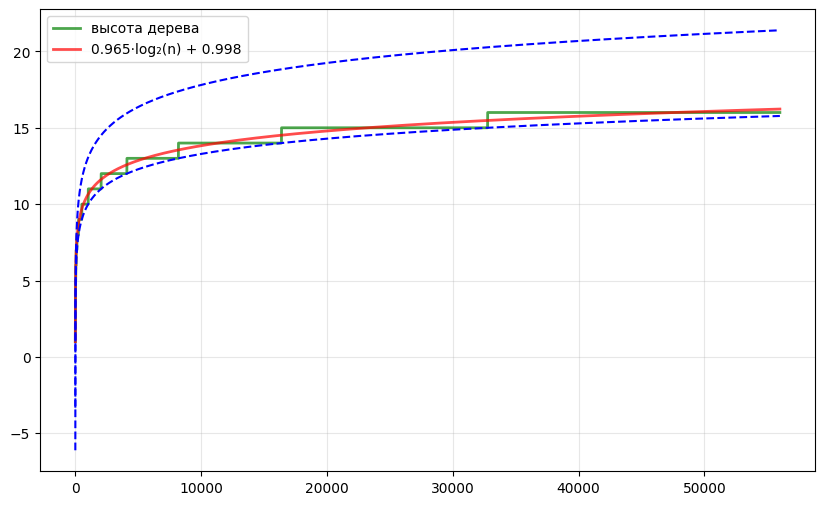

In [27]:
n, h = np.loadtxt('Debug x64\\stat_AVL_monoton.txt', unpack=True)
print('Статистика по АВЛ-дереву с монотонно увеличивающимися значениями')

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'green', linewidth=2, alpha=0.7,
        label='высота дерева')

def stat(a,b):
        return a*x + b

def MSE(a,b):
        f = stat(a,b)
        return np.average(np.square(f-y))

step = 0.0005
a = 1.0
b = 1.0

MSE_prev = MSE(a,b)
print(f"Начальный MSE: {MSE_prev:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        a_prev = a
        b_prev = b
        a-=step*grad_a
        b-=step*grad_b
        
        MSE_current = MSE(a,b)
        if (MSE_prev < MSE_current):
                a = a_prev
                b = b_prev
                break
        else:
                MSE_prev = MSE_current

print(f"MSE = {MSE(a, b):.6f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = 1.44 * np.log2(x) - 1.33
plt.plot(x, y, 'b--')
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по красно-чёрному дереву со случайными значениями
Начальный MSE: 17.799742
MSE = 0.112054


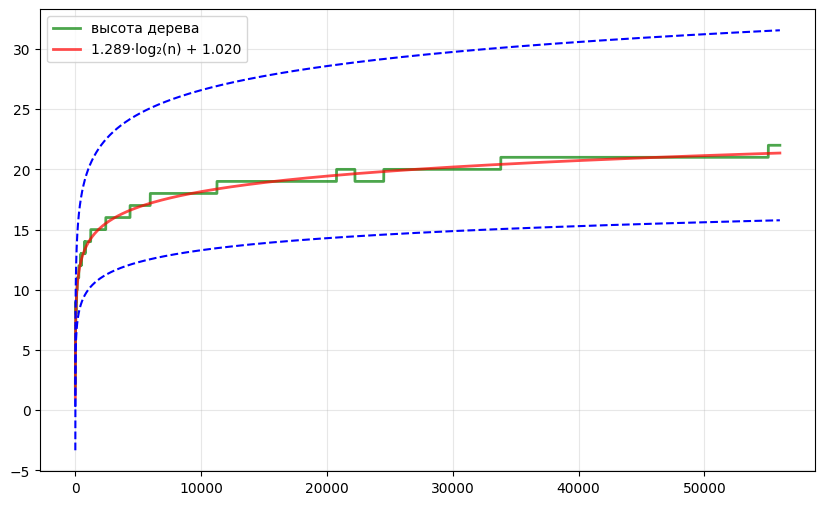

In [28]:
n, h = np.loadtxt('Debug x64\\stat_RNB.txt', unpack=True)
print('Статистика по красно-чёрному дереву со случайными значениями')

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'green', linewidth=2, alpha=0.7,
        label='высота дерева')

def stat(a,b):
        return a*x + b

def MSE(a,b):
        f = stat(a,b)
        return np.average(np.square(f-y))

step = 0.0005
a = 1.0
b = 1.0

MSE_prev = MSE(a,b)
print(f"Начальный MSE: {MSE_prev:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        a_prev = a
        b_prev = b
        a-=step*grad_a
        b-=step*grad_b
        
        MSE_current = MSE(a,b)
        if (MSE_prev < MSE_current):
                a = a_prev
                b = b_prev
                break
        else:
                MSE_prev = MSE_current

print(f"MSE = {MSE(a, b):.6f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = 2 * np.log2(x + 1)
plt.plot(x, y, 'b--')
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по красно-чёрному дереву с мнотонно увеличивающимися значениями
Начальный MSE: 164.583618
MSE = 0.117782


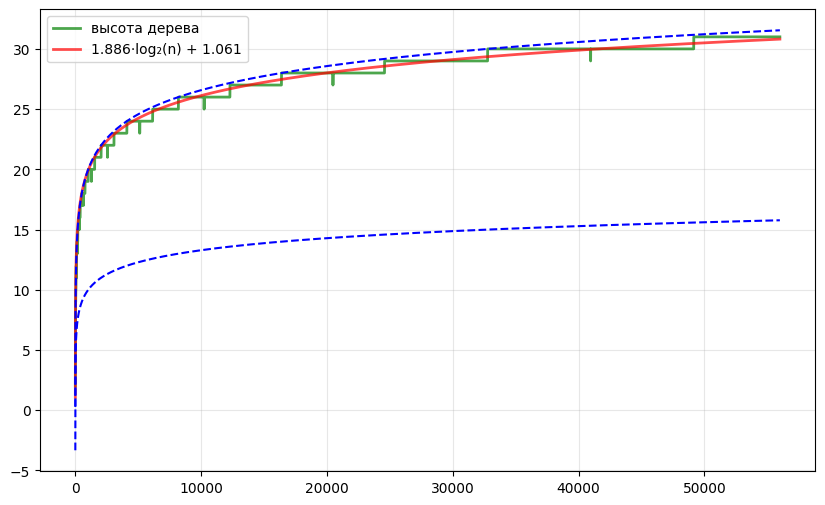

In [29]:
n, h = np.loadtxt('Debug x64\\stat_RNB_monoton.txt', unpack=True)
print('Статистика по красно-чёрному дереву с мнотонно увеличивающимися значениями')

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'green', linewidth=2, alpha=0.7,
        label='высота дерева')

def stat(a,b):
        return a*x + b

def MSE(a,b):
        f = stat(a,b)
        return np.average(np.square(f-y))

step = 0.0005
a = 1.0
b = 1.0

MSE_prev = MSE(a,b)
print(f"Начальный MSE: {MSE_prev:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        a_prev = a
        b_prev = b
        a-=step*grad_a
        b-=step*grad_b
        
        MSE_current = MSE(a,b)
        if (MSE_prev < MSE_current):
                a = a_prev
                b = b_prev
                break
        else:
                MSE_prev = MSE_current

print(f"MSE = {MSE(a, b):.6f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = 2 * np.log2(x + 1)
plt.plot(x, y, 'b--')
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)